In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("clean_data.csv", index_col=0)
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [27]:
# Get the average, median, mode and standard deviation of the total sales per branch.

sales_by_branch = df.groupby("branch")["total"]

average = sales_by_branch.mean()
median = sales_by_branch.median()
mode = sales_by_branch.apply(lambda x: x.mode()[0])  # Obtiene la primera moda si hay más de una
standard_deviation = sales_by_branch.std()

statistics = pd.DataFrame({
    "average" : average,
    "median" : median,
    "mode" : mode,
    "standard_deviation" : standard_deviation
})

statistics

,average,median,mode,standard_deviation
branch,,,,
A,312.354031,240.82800,216.846,231.640025
B,319.872506,252.88200,263.970,242.447565
C,337.099715,271.41975,829.080,263.160870


In [33]:
#Compare sales behavior between genders (female/male)

#Group sales by gender
sales_by_gender = df.groupby('gender')['total'].sum().round(2)

#Calculates sales average by gender
average_sales_by_gender = df.groupby('gender')['total'].mean().round(2)

#Count transactions by gender
transactions_by_gender = df['gender'].value_counts()

#Create dataframe with those values
sales_comparison = pd.DataFrame({
    'total_sales': sales_by_gender,
    'average_sales': average_sales_by_gender,
    'transactions': transactions_by_gender
})

# sales_comparison.reset_index(inplace=True)
# sales_comparison(columns={'index': 'Gender'}, inplace=True)

sales_comparison.reset_index(inplace=True)
sales_comparison

,gender,total_sales,average_sales,transactions
0,Female,167882.92,335.10,501
1,Male,155083.82,310.79,499


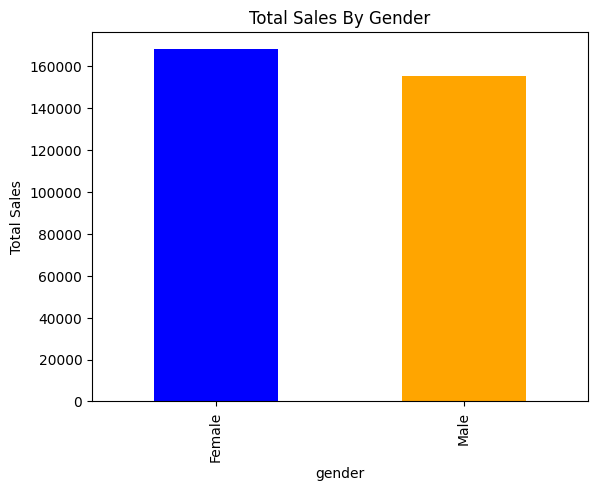

In [34]:
#Compare total sales
sales_by_gender.plot(kind='bar', title='Total Sales By Gender', color=["blue", "orange"])
plt.ylabel('Total Sales')
plt.show()

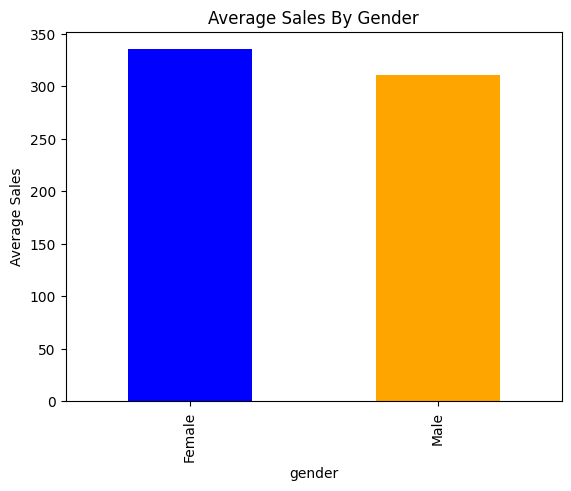

In [35]:
average_sales_by_gender.plot(kind='bar', title='Average Sales By Gender', color=["blue", "orange"])
plt.ylabel('Average Sales')
plt.show()